# Task-5 Decision Tree Implementation

## Question-4

Q4. Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for:

1. learning the tree,
2. predicting for test data. 

How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees.

> You should be editing `experiments.py` for the code containing the above experiments.



### Importing required libraries

In [1]:
import sys
import os

# Add the path to the directory containing tree.py
sys.path.append(os.path.abspath("../"))

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from tree.base import DecisionTree
from metrics import *



np.random.seed(42)

### Function to generate fake data

In [2]:
def generate_data(num_samples, num_features, x_type, y_type):
    # Generate input features
    if x_type == "real":
        X = pd.DataFrame(np.random.randn(num_samples, num_features))
    elif x_type == "discrete":
        X = pd.DataFrame({
            i: pd.Series(np.random.randint(2, size=num_samples), dtype="category") 
            for i in range(num_features)
        })
    
   
    if y_type == "real":
        y = pd.Series(np.random.randn(num_samples))
    elif y_type == "discrete":
        y = pd.Series(np.random.randint(num_features, size=num_samples), dtype="category")
    
    return X, y

### Function to evaluate the runtime of the Decision Tree

In [3]:
def evaluate_runtime(N, M, input_type, output_type, test_size, criterias):
    X, y = generate_data(N, M, input_type, output_type)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    time_data = {}
    for criteria in criterias:
        tree = DecisionTree(criterion=criteria, max_depth=5)
        
        start_train = time.time()
        tree.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train

        start_test = time.time()
        y_pred = tree.predict(X_test)
        end_test = time.time()
        test_time = end_test - start_test

        print(f"Criteria: {criteria}")
        print(f"Training Time: {train_time:.4f} seconds")
        print(f"Prediction Time: {test_time:.4f} seconds")

        time_data[criteria] = {"train_time": train_time, "test_time": test_time}

    return time_data

### Evaluating runtimes of decision tress using different values of M (no. of samples) and N (no. of features)

In [4]:
N_values = [50, 100, 500]
M_values = [1, 5, 10, 20]

criterias = ["information_gain", "gini_index"]


In [5]:
results = {}
for N in N_values:
    for M in M_values:
        print(f"\nEvaluating for N={N}, M={M}\n")
        results[(N, M)] = {}
        for input_type in ["real", "discrete"]:
            for output_type in ["real", "discrete"]:
                print(f"Input type: {input_type}, Output type: {output_type}")
                results[(N, M)][(input_type, output_type)] = evaluate_runtime(N, M, input_type, output_type, 0.2, criterias)
                print()
        print("-" * 50)



Evaluating for N=50, M=1

Input type: real, Output type: real
Criteria: information_gain
Training Time: 0.3467 seconds
Prediction Time: 0.0020 seconds
Criteria: gini_index
Training Time: 0.7052 seconds
Prediction Time: 0.0000 seconds

Input type: real, Output type: discrete
Criteria: information_gain
Training Time: 0.0010 seconds
Prediction Time: 0.0000 seconds
Criteria: gini_index
Training Time: 0.0010 seconds
Prediction Time: 0.0000 seconds

Input type: discrete, Output type: real
Criteria: information_gain
Training Time: 0.0056 seconds
Prediction Time: 0.0000 seconds
Criteria: gini_index
Training Time: 0.0062 seconds
Prediction Time: 0.0000 seconds

Input type: discrete, Output type: discrete
Criteria: information_gain
Training Time: 0.0004 seconds
Prediction Time: 0.0000 seconds
Criteria: gini_index
Training Time: 0.0011 seconds
Prediction Time: 0.0000 seconds

--------------------------------------------------

Evaluating for N=50, M=5

Input type: real, Output type: real
Criteri

### Plotting train and predict time vs N / M 

In [6]:
def results_to_df(results):


    rows = []

    for (N, M), input_output_dict in results.items():
        for (input_type, output_type), time_data in input_output_dict.items():
            for criterion, times in time_data.items():
                row = {
                    "N": N,
                    "M": M,
                    "input_type": input_type,
                    "output_type": output_type,
                    "criterion": criterion,
                    "train_time": times.get("train_time", None),
                    "test_time": times.get("test_time", None)
                }
                rows.append(row)


    df = pd.DataFrame(rows)
    return df
df = results_to_df(results) 


In [7]:
df

,N,M,input_type,output_type,criterion,train_time,test_time
0,50,1,real,real,information_gain,0.346685,0.002050
1,50,1,real,real,gini_index,0.705220,0.000000
2,50,1,real,discrete,information_gain,0.000997,0.000000
3,50,1,real,discrete,gini_index,0.000999,0.000000
4,50,1,discrete,real,information_gain,0.005571,0.000000
...,...,...,...,...,...,...,...
91,500,20,real,discrete,gini_index,43.413213,0.007028
92,500,20,discrete,real,information_gain,0.466384,0.005004
93,500,20,discrete,real,gini_index,0.666376,0.007647
94,500,20,discrete,discrete,information_gain,1.129397,0.005000


Plots for information_gain:


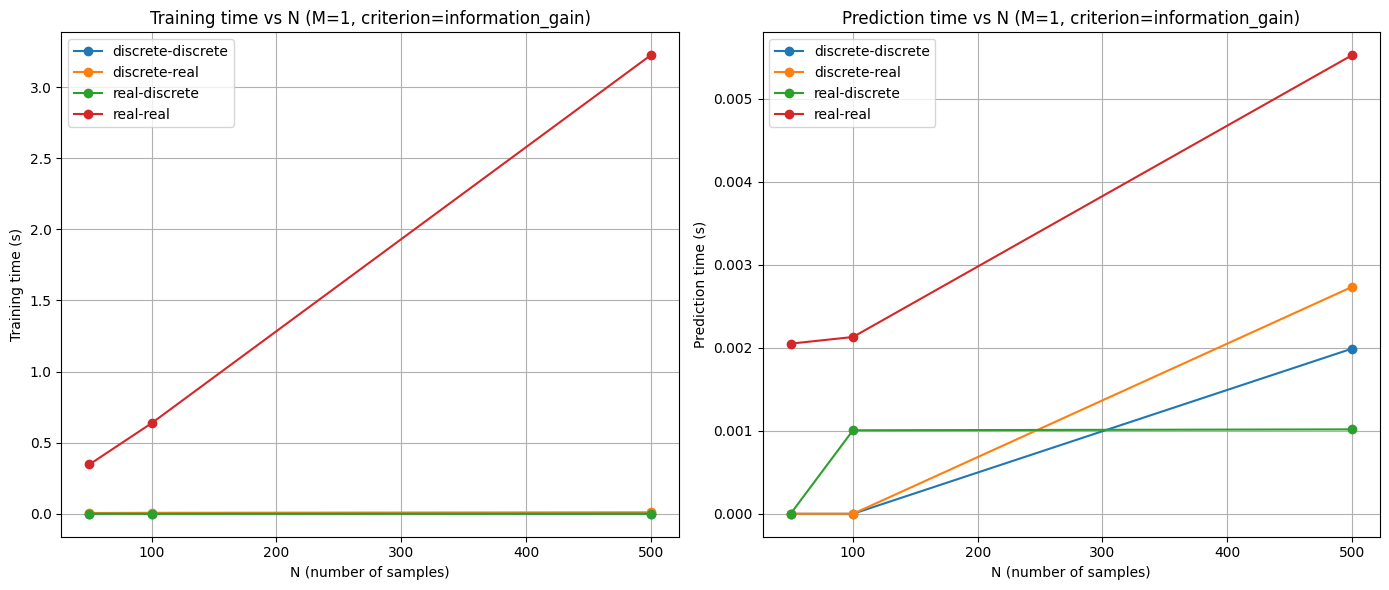

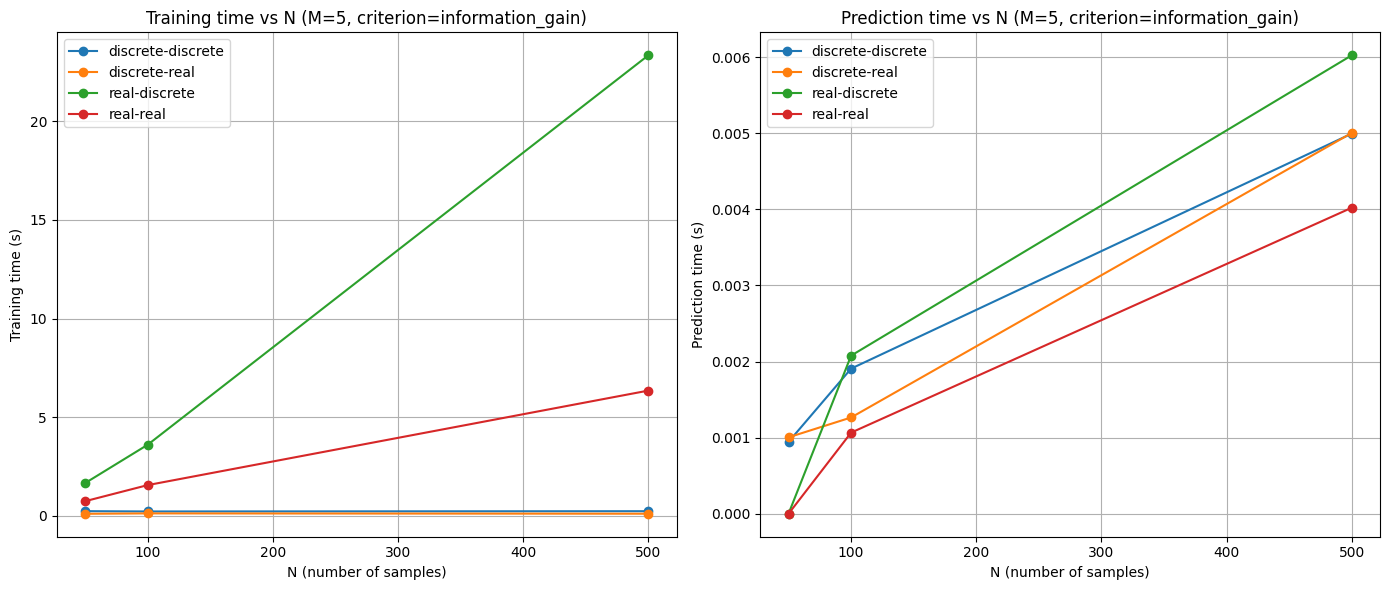

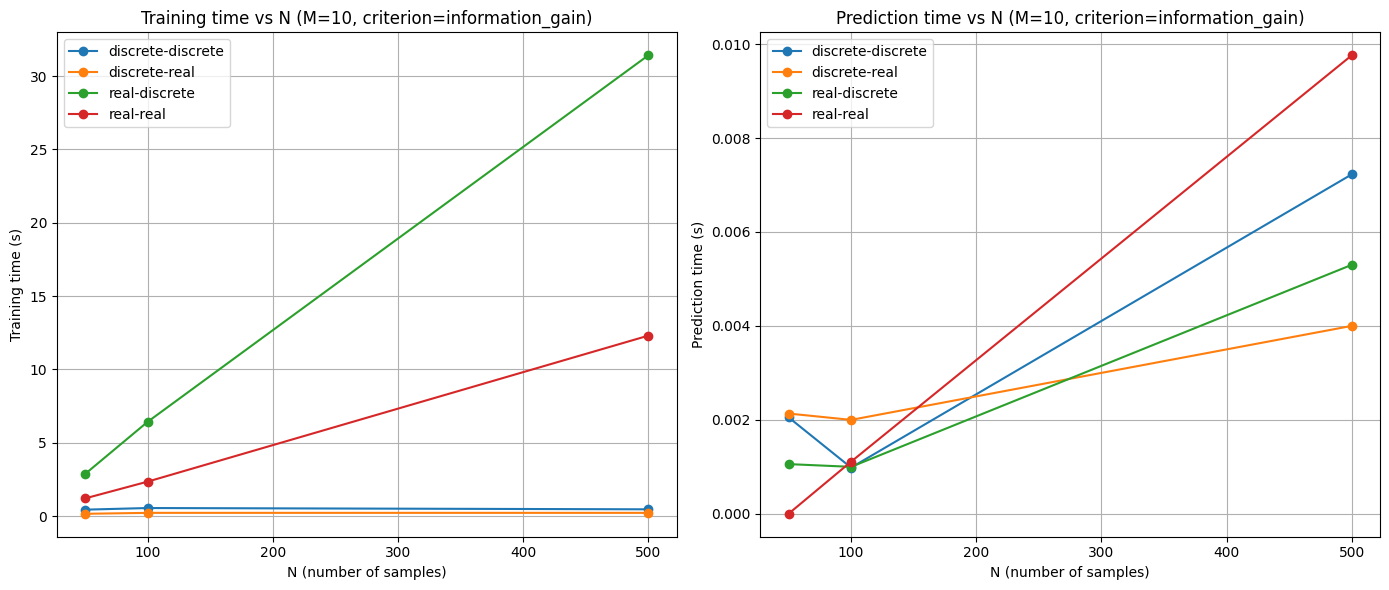

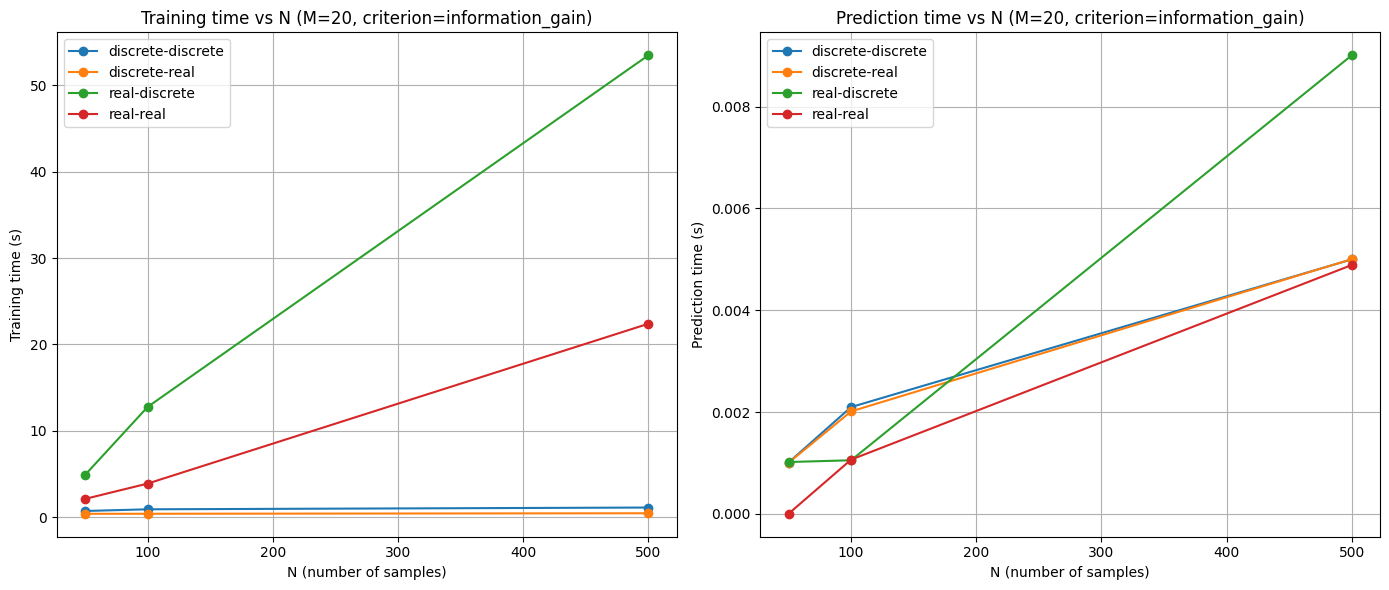

Plots for gini_index:


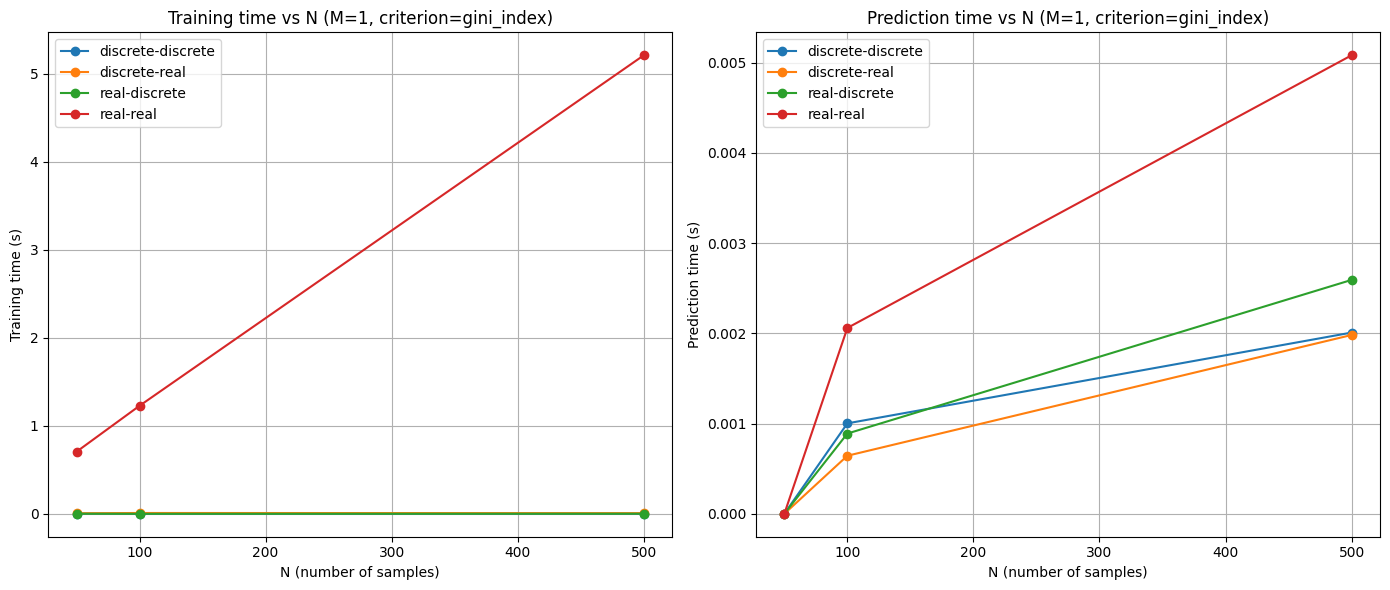

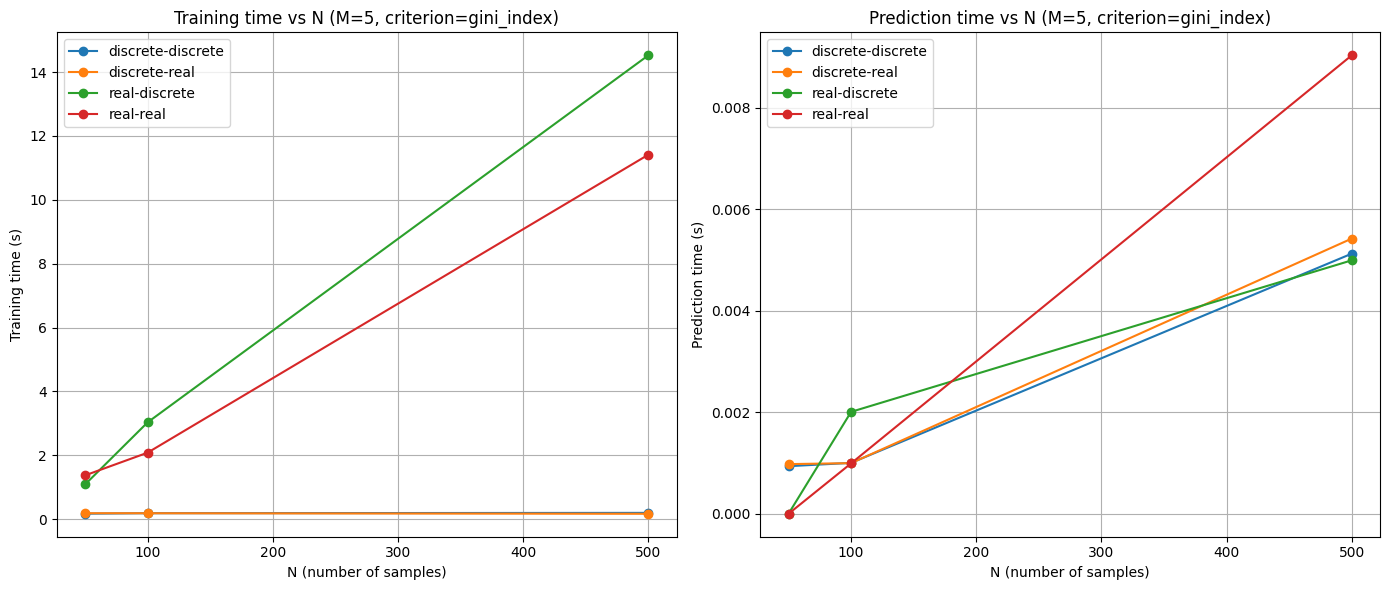

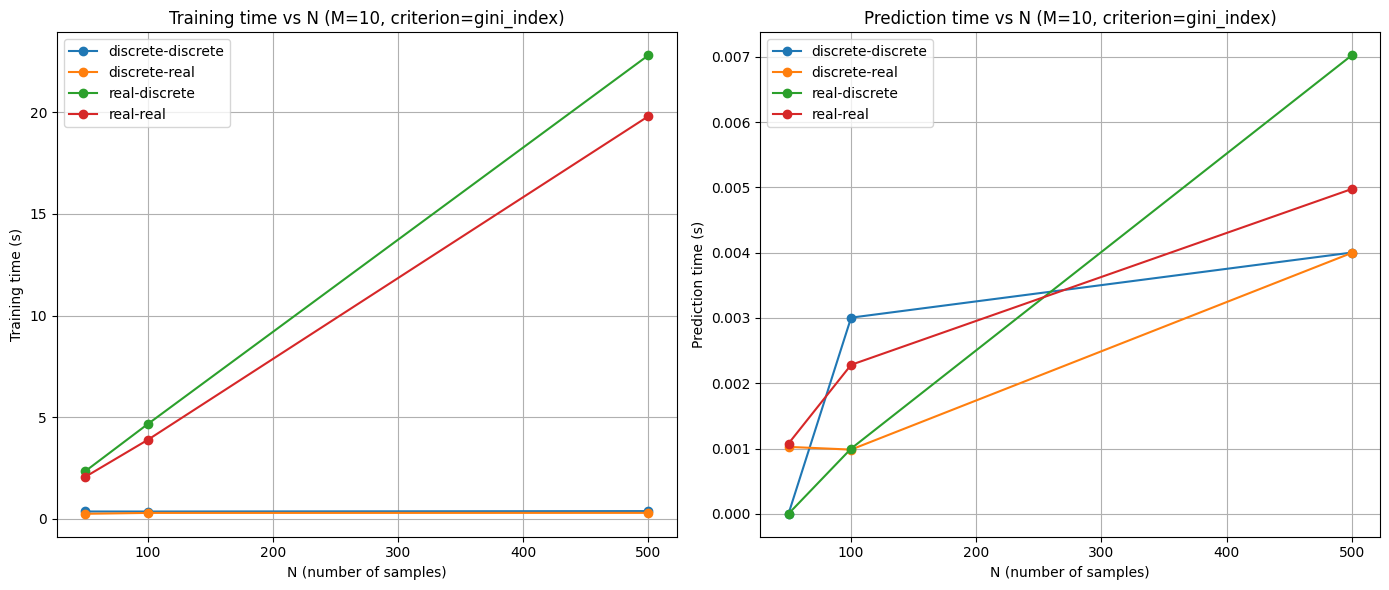

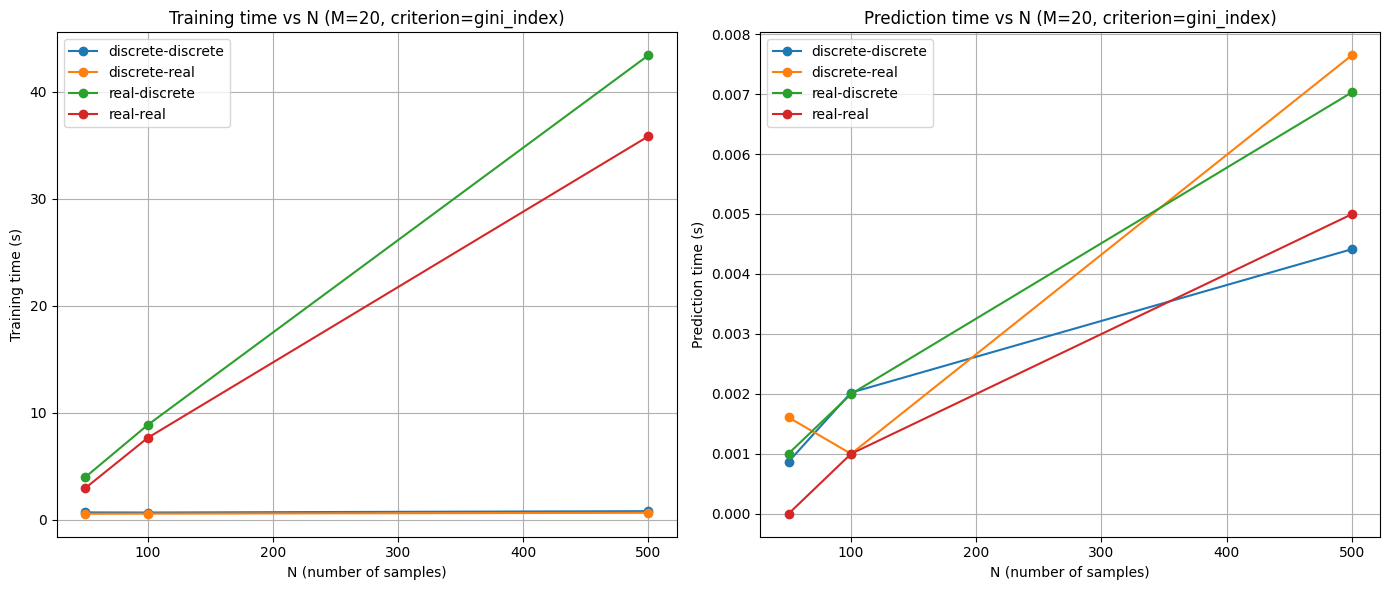

In [8]:
def plot_combined_time_complexity_N(df, criterion='information_gain'):
    unique_M = np.sort(df['M'].unique())
    for M in unique_M:
        single_M_df = df[(df['M'] == M) & (df['criterion'] == criterion)]
       

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
        axes = axes.ravel()

        for (in_type, out_type), group in single_M_df.groupby(['input_type', 'output_type']):
            grp = group.sort_values('N')
            label = f"{in_type}-{out_type}"
            axes[0].plot(grp['N'], grp['train_time'], marker='o', label=label)
            axes[1].plot(grp['N'], grp['test_time'], marker='o', label=label)

        axes[0].set_title(f'Training time vs N (M={M}, criterion={criterion})')
        axes[0].set_xlabel('N (number of samples)')
        axes[0].set_ylabel('Training time (s)')
        axes[0].grid(True)
        axes[0].legend()

        axes[1].set_title(f'Prediction time vs N (M={M}, criterion={criterion})')
        axes[1].set_xlabel('N (number of samples)')
        axes[1].set_ylabel('Prediction time (s)')
        axes[1].grid(True)
        axes[1].legend()

        plt.tight_layout()
        plt.show()

print("Plots for information_gain:")
plot_combined_time_complexity_N(df, 'information_gain')
print("Plots for gini_index:")
plot_combined_time_complexity_N(df, 'gini_index')

Plots for information_gain:


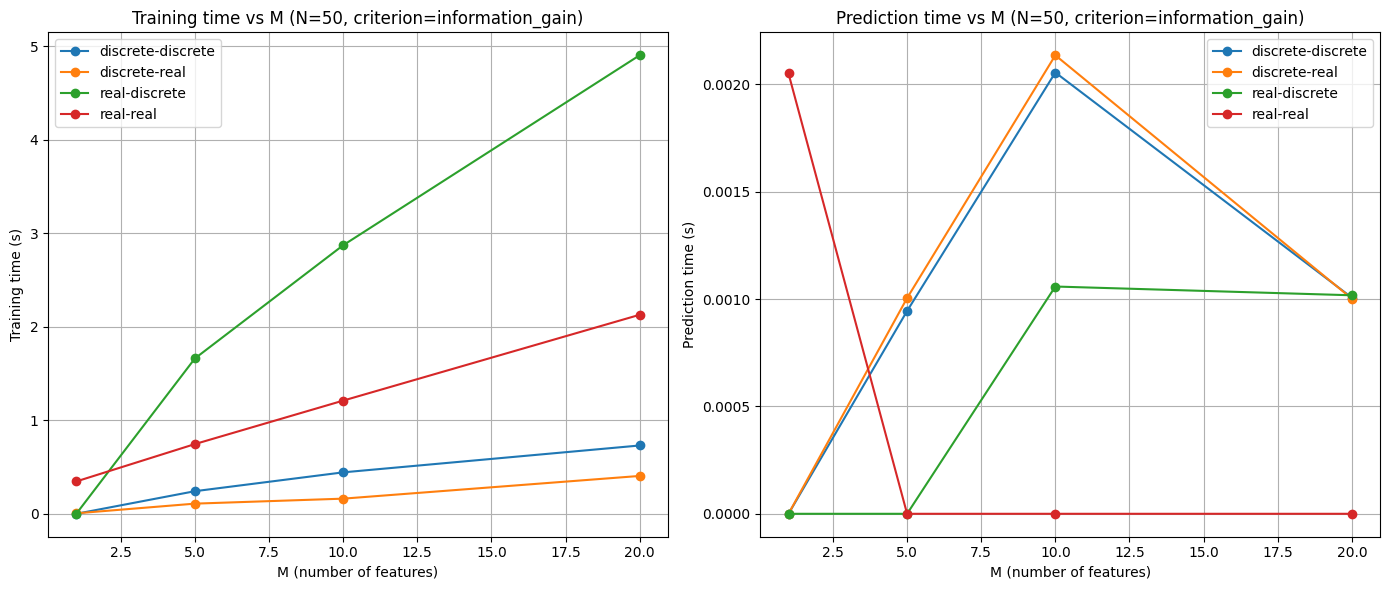

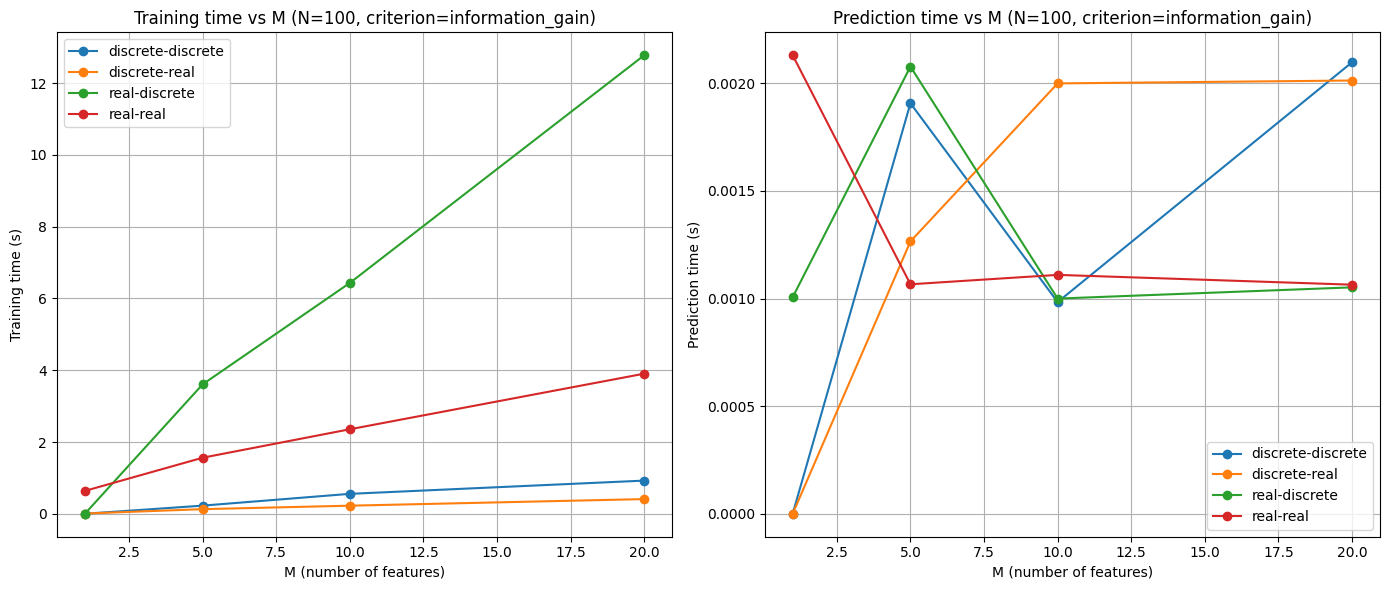

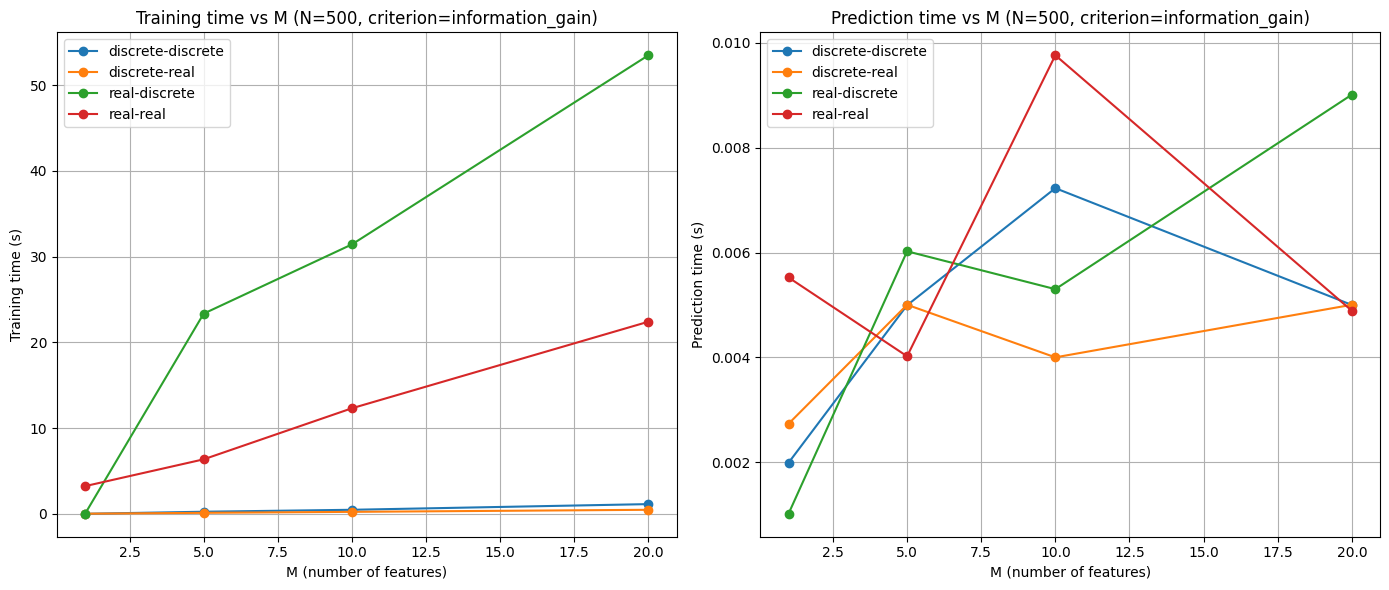

Plots for gini_index:


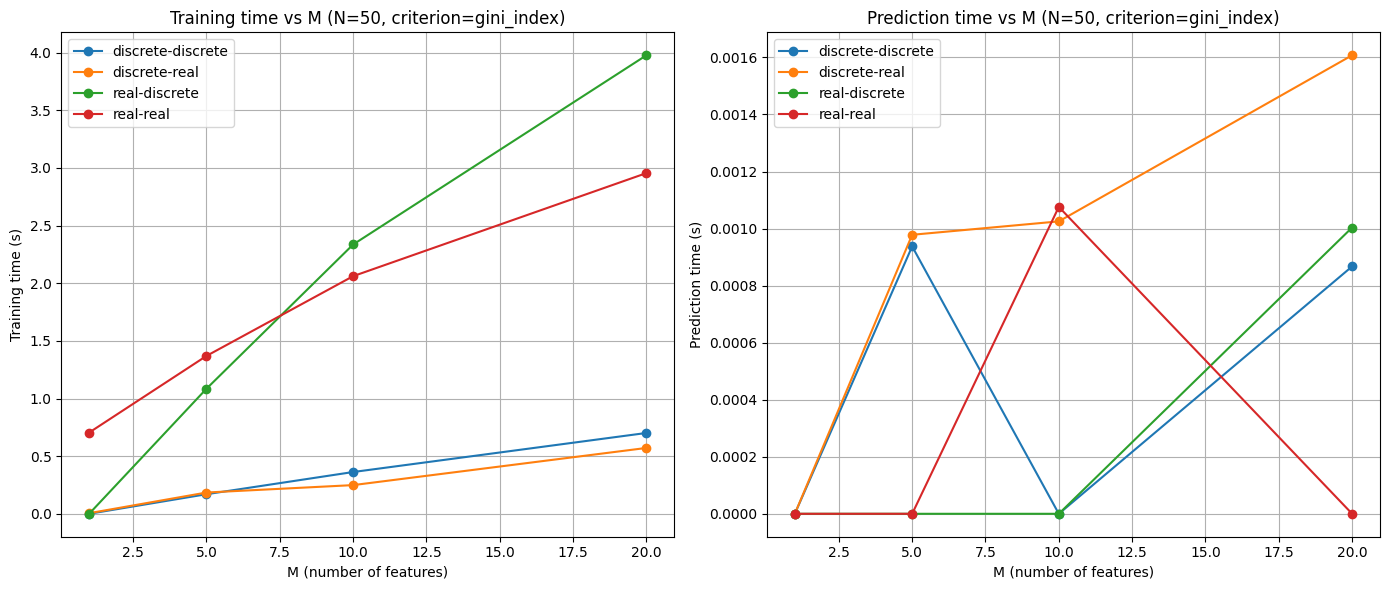

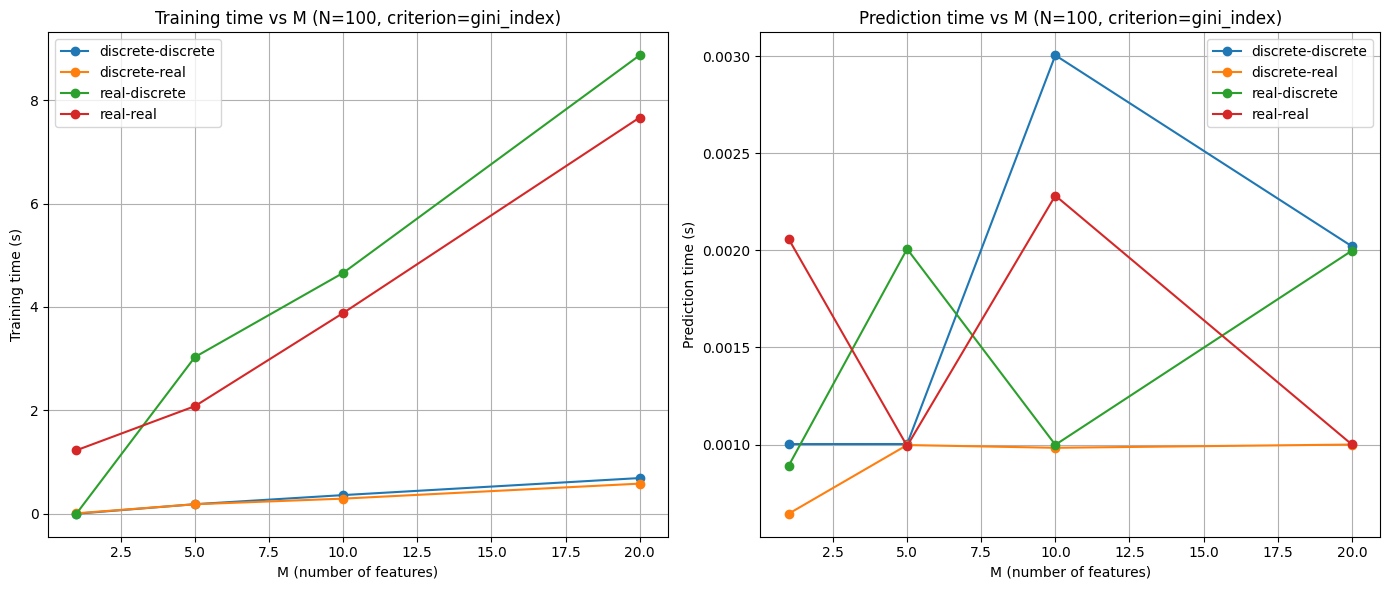

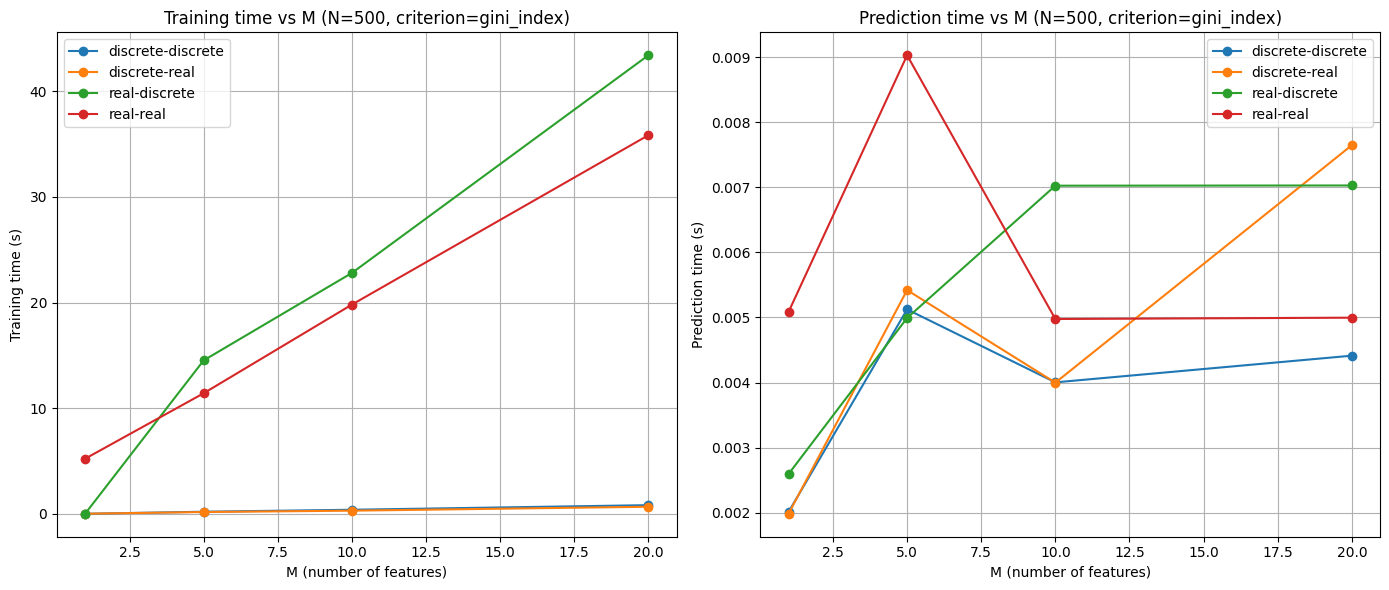

In [9]:
def plot_combined_time_complexity_M(df, criterion='information_gain'):
    unique_N = np.sort(df['N'].unique())
    for N in unique_N:
        single_N_df = df[(df['N'] == N) & (df['criterion'] == criterion)]
      

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
        axes = axes.ravel()

        for (in_type, out_type), group in single_N_df.groupby(['input_type', 'output_type']):
            grp = group.sort_values('M')
            label = f"{in_type}-{out_type}"
            axes[0].plot(grp['M'], grp['train_time'], marker='o', label=label)
            axes[1].plot(grp['M'], grp['test_time'], marker='o', label=label)

        axes[0].set_title(f'Training time vs M (N={N}, criterion={criterion})')
        axes[0].set_xlabel('M (number of features)')
        axes[0].set_ylabel('Training time (s)')
        axes[0].grid(True)
        axes[0].legend()

        axes[1].set_title(f'Prediction time vs M (N={N}, criterion={criterion})')
        axes[1].set_xlabel('M (number of features)')
        axes[1].set_ylabel('Prediction time (s)')
        axes[1].grid(True)
        axes[1].legend()

        plt.tight_layout()
        plt.show()

print("Plots for information_gain:")
plot_combined_time_complexity_M(df, 'information_gain')
print("Plots for gini_index:")
plot_combined_time_complexity_M(df, 'gini_index')

From the graphs, it is clear that prediction times are significantly higher for real-valued inputs compared to discrete inputs.  

The depth of a decision tree is generally on the order of **O(log N)**, though in the worst case it can grow to **O(N)**.  

### Training Time  
The theoretical complexity of training a decision tree is **O(M·N·log N)**, where *N* is the number of samples and *M* is the number of features.  
- The plotted results confirm this behavior: training time increases nearly linearly with both *M* and *N*, in line with the expected complexity.  
- This is expected, since the **N·log N** curve is also close to linear.  

### Prediction Time  
The complexity of predicting a single sample is proportional to the **tree depth**. For balanced trees, this is typically **O(log N)**.  
- In practice, prediction may terminate earlier if a leaf node is reached before the maximum depth, leading to reduced times.  
- The plots show that prediction time rises with *N* (log N pattern), but remains almost constant with respect to *M*.  

### Conclusion  
The observed results align with theoretical expectations:  
- Training times follow **O(M·N·log N)**.  
- Prediction times follow an overall **O(log N)** trend, increasing with *N* but largely independent of *M*.  
